# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 586
['hasaki', 'kapuskasing', 'albany', 'dunedin', 'talnakh', 'port-aux-francais', 'la passe', 'hilo', 'edinburgh of the seven seas', 'xinghua', 'hawaiian paradise park', 'walvis bay', 'hammerfest', 'kone', 'georgetown', 'ihosy', 'thompson', 'mar del plata', 'cooma', 'adamstown', 'qaqortoq', 'colonia', 'olonkinbyen', 'hermanus', 'neryungri', 'nemuro', 'broome', 'selfoss', 'punta arenas', 'saipan', 'bargaal', 'coronel dorrego', 'port elizabeth', 'redencao', 'waitangi', 'prairie ridge', 'bethel', 'chonchi', 'wailua homesteads', 'lazaro cardenas', 'utrik', 'muscat', 'west island', "cox's bazar", 'kodiak', 'avarua', 'vilyuchinsk', 'semey', 'susuman', 'bredasdorp', 'puerto natales', 'ust-nera', 'sao joao da barra', 'khovd', 'burutu', 'gwandu', 'tiksi', 'bang saphan', 'ancud', 'grytviken', 'tofol', 'papatowai', 'taiohae', 'ushibukamachi', 'berdigestyakh', 'anadyr', 'el bolson', 'ushuaia', 'blackmans bay', 'coahuayana de hidalgo', 'port mathurin', 'utete', 'nova 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Define Units
unit = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_test = requests.get(city_url)
        city_weather = city_weather_test.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | kapuskasing
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | la passe
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | xinghua
Processing Record 11 of Set 1 | hawaiian paradise park
Processing Record 12 of Set 1 | walvis bay
Processing Record 13 of Set 1 | hammerfest
Processing Record 14 of Set 1 | kone
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | ihosy
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | mar del plata
Processing Record 19 of Set 1 | cooma
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | colonia
Processing R

Processing Record 39 of Set 4 | codrington
Processing Record 40 of Set 4 | mwaro
Processing Record 41 of Set 4 | ishigaki
Processing Record 42 of Set 4 | mamontovo
Processing Record 43 of Set 4 | bel ombre
Processing Record 44 of Set 4 | ta`u
Processing Record 45 of Set 4 | bethanie
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | dudinka
Processing Record 48 of Set 4 | sao vicente
Processing Record 49 of Set 4 | dukhan
Processing Record 0 of Set 5 | kavaratti
Processing Record 1 of Set 5 | st. john's
Processing Record 2 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 3 of Set 5 | kaohsiung
Processing Record 4 of Set 5 | alotau
City not found. Skipping...
Processing Record 5 of Set 5 | nishifukuma
Processing Record 6 of Set 5 | muroto-misakicho
Processing Record 7 of Set 5 | camacupa
Processing Record 8 of Set 5 | fisterra
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | changyon
Processing Record 11 of Set 5 | varva
P

Processing Record 30 of Set 8 | zaragoza
Processing Record 31 of Set 8 | fort mcmurray
Processing Record 32 of Set 8 | khandyga
Processing Record 33 of Set 8 | al kharijah
Processing Record 34 of Set 8 | emmett
Processing Record 35 of Set 8 | san rafael
Processing Record 36 of Set 8 | nadym
Processing Record 37 of Set 8 | tobelo
Processing Record 38 of Set 8 | howrah
Processing Record 39 of Set 8 | drayton valley
Processing Record 40 of Set 8 | popondetta
Processing Record 41 of Set 8 | kuraymah
Processing Record 42 of Set 8 | red hill
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | taltal
Processing Record 45 of Set 8 | liski
Processing Record 46 of Set 8 | brisas de zicatela
Processing Record 47 of Set 8 | aginskoye
Processing Record 48 of Set 8 | baiquan
Processing Record 49 of Set 8 | mora
Processing Record 0 of Set 9 | kurchatov
Processing Record 1 of Set 9 | aktau
Processing Record 2 of Set 9 | luderitz
Processing Record 3 of Set 9 | aral
Processing Recor

Processing Record 19 of Set 12 | al mawsil al jadidah
Processing Record 20 of Set 12 | karratha
Processing Record 21 of Set 12 | changji
Processing Record 22 of Set 12 | el calafate
Processing Record 23 of Set 12 | bubaque
Processing Record 24 of Set 12 | salahonda
Processing Record 25 of Set 12 | puerto deseado
Processing Record 26 of Set 12 | port saint john's
Processing Record 27 of Set 12 | baniachang
Processing Record 28 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 29 of Set 12 | turbat
Processing Record 30 of Set 12 | pandan
Processing Record 31 of Set 12 | bam
Processing Record 32 of Set 12 | ayr
Processing Record 33 of Set 12 | kununurra
Processing Record 34 of Set 12 | vladimirescu
Processing Record 35 of Set 12 | alexandria
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count 
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hasaki,35.7333,140.8333,22.38,71,100,1.87,JP,1696470831
1,kapuskasing,49.4169,-82.4331,21.00,68,100,6.17,CA,1696470662
2,albany,42.6001,-73.9662,21.23,88,0,1.56,US,1696470710
3,dunedin,-45.8742,170.5036,21.71,66,100,2.68,NZ,1696470610
4,talnakh,69.4865,88.3972,-3.45,95,100,3.22,RU,1696470831


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/sehaj/Downloads/Starter_Code 20/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("/Users/sehaj/Downloads/Starter_Code 20/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,22.38,71,100,1.87,JP,1696470831
1,kapuskasing,49.4169,-82.4331,21.00,68,100,6.17,CA,1696470662
2,albany,42.6001,-73.9662,21.23,88,0,1.56,US,1696470710
3,dunedin,-45.8742,170.5036,21.71,66,100,2.68,NZ,1696470610
4,talnakh,69.4865,88.3972,-3.45,95,100,3.22,RU,1696470831


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

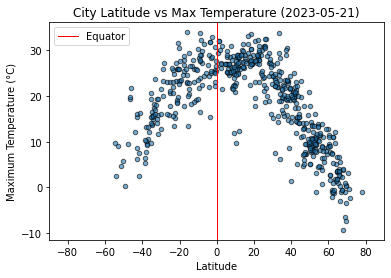

In [8]:
# Build scatter plot for Latitude vs. Temperature, customize properties as needed
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", \
                 xlabel="Latitude", ylabel="Maximum Temperature (°C)", title="City Latitude vs Max Temperature (2023-05-21)", \
                  grid=True, alpha=.6, edgecolors="black", linewidth=1)

# Incorporate other graph properties
plt.xlim(-90,90)
plt.axvline(0, color="red", linewidth=1, label="Equator")
plt.grid(linestyle="--")
plt.legend(loc="upper left")

# Save the figure
plt.savefig("/Users/sehaj/Downloads/Starter_Code 20/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

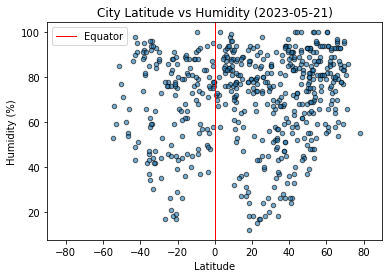

In [9]:
# Build scatter plot for Latitude vs. Humidity, customize properties as needed
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", \
                 xlabel="Latitude", ylabel="Humidity (%)", title="City Latitude vs Humidity (2023-05-21)", \
                  grid=True, alpha=.6, edgecolors="black", linewidth=1)

# Incorporate other graph properties
plt.xlim(-90,90)
plt.axvline(0, color="red", linewidth=1, label="Equator")
plt.grid(linestyle="--")
plt.legend(loc="upper left")

# Save the figure
plt.savefig("/Users/sehaj/Downloads/Starter_Code 20/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

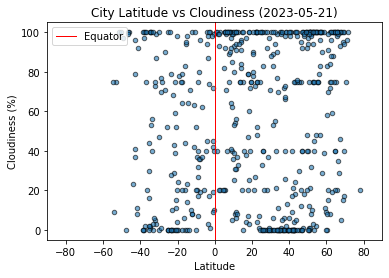

In [10]:
# Build scatter plot for Latitude vs. Cloudiness, customize properties as needed
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", \
                 xlabel="Latitude", ylabel="Cloudiness (%)", title="City Latitude vs Cloudiness (2023-05-21)", \
                  grid=True, alpha=.6, edgecolors="black", linewidth=1)

# Other graph properties
plt.xlim(-90,90)
plt.axvline(0, color="red", linewidth=1, label="Equator")
plt.grid(linestyle="--")
plt.legend(loc="upper left")

# Save the figure
plt.savefig("/Users/sehaj/Downloads/Starter_Code 20/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

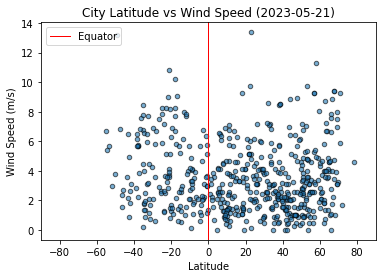

In [11]:

# Build scatter plot for Latitude vs. Wind Speed, customize properties as needed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", \
                 xlabel="Latitude", ylabel="Wind Speed (m/s)", title="City Latitude vs Wind Speed (2023-05-21)", \
                  grid=True, alpha=.6, edgecolors="black", linewidth=1)

# Other graph properties
plt.xlim(-90,90)
plt.axvline(0, color="red", linewidth=1, label="Equator")
plt.grid(linestyle="--")
plt.legend(loc="upper left")

# Save the figure
plt.savefig("/Users/sehaj/Downloads/Starter_Code 20/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def reg_this(x, y):
    result = linregress(x, y)
    return result

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,22.38,71,100,1.87,JP,1696470831
1,kapuskasing,49.4169,-82.4331,21.00,68,100,6.17,CA,1696470662
2,albany,42.6001,-73.9662,21.23,88,0,1.56,US,1696470710
4,talnakh,69.4865,88.3972,-3.45,95,100,3.22,RU,1696470831
6,la passe,45.5549,-0.8967,11.10,68,30,3.26,FR,1696470832


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,dunedin,-45.8742,170.5036,21.71,66,100,2.68,NZ,1696470610
5,port-aux-francais,-49.3500,70.2167,0.40,71,97,13.21,TF,1696470832
8,edinburgh of the seven seas,-37.0676,-12.3116,10.51,66,75,3.87,SH,1696470832
11,walvis bay,-22.9575,14.5053,13.53,88,10,5.14,NaN,1696470833
13,kone,-21.0595,164.8658,26.04,45,15,4.13,NC,1696470833


###  Temperature vs. Latitude Linear Regression Plot

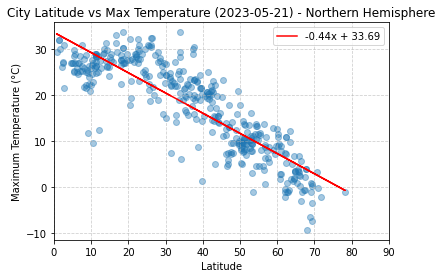

The r-value is -0.8627653246070669
The p-value is 1.1994260878888446e-119
The standard error is 0.01292550321727278


In [15]:
# NORTH
# Call Regression Function here
X = northern_hemi_df["Lat"]
Y = northern_hemi_df["Max Temp"]
result = reg_this(X, Y)

# Get the appropriate scatter plot
# Some features reduced so it doesn't look as cluttered and the linear regression line can be accentuated.
plt.scatter(X, Y, alpha=.4)

# Other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°C)")
plt.title("City Latitude vs Max Temperature (2023-05-21) - Northern Hemisphere")
plt.xlim(0,90)
plt.grid(linestyle="--", alpha = .6)

# Graph LinReg plot here
plt.plot(X, (result.slope*X+result.intercept), label=f"{result.slope:.2f}x + {result.intercept:.2f}", color = "red")

# Show plots
plt.legend(loc="best")
plt.show()
print(f"The r-value is {result.rvalue}")
print(f"The p-value is {result.pvalue}")
print(f"The standard error is {result.stderr}")

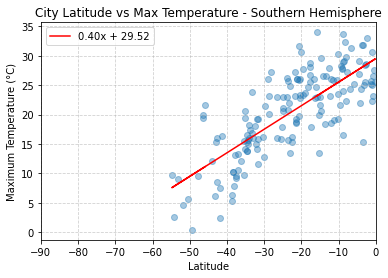

The r-value is 0.772507997478146
The p-value is 3.567970607456212e-33
The standard error is 0.0260977648714749


In [16]:
# SOUTH
# Call Regression Function here
X = southern_hemi_df["Lat"]
Y = southern_hemi_df["Max Temp"]
result = reg_this(X, Y)

# Get the appropriate scatter plot
# Some features reduced so it doesn't look as cluttered and the linear regression line can be accentuated.
plt.scatter(X, Y, alpha=.4)

# Other graph properties
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°C)")
plt.title("City Latitude vs Max Temperature - Southern Hemisphere")
plt.xlim(-90,0)
plt.grid(linestyle="--", alpha = .6)

# Graph LinReg plot here
plt.plot(X, (result.slope*X+result.intercept), label=f"{result.slope:.2f}x + {result.intercept:.2f}", color = "red")

# Show plots
plt.legend(loc="best")
plt.show()
print(f"The r-value is {result.rvalue}")
print(f"The p-value is {result.pvalue}")
print(f"The standard error is {result.stderr}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

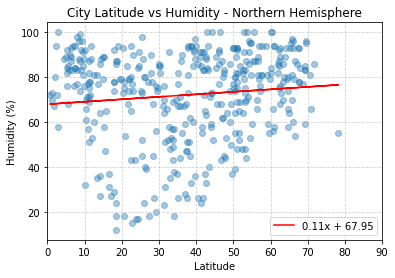

The r-value is 0.10641395844307375
The p-value is 0.03358783224009804
The standard error is 0.051766040513918914


In [17]:
# NORTH
# Call Regression Function here
X = northern_hemi_df["Lat"]
Y = northern_hemi_df["Humidity"]
result = reg_this(X, Y)

# Get the appropriate scatter plot
# Some features reduced so it doesn't look as cluttered and the linear regression line can be accentuated.
plt.scatter(X, Y, alpha=.4)

# Other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity - Northern Hemisphere")
plt.xlim(0,90)
plt.grid(linestyle="--", alpha = .6)

# Graph LinReg plot here
plt.plot(X, (result.slope*X+result.intercept), label=f"{result.slope:.2f}x + {result.intercept:.2f}", color = "red")

# Show plots
plt.legend(loc="best")
plt.show()
print(f"The r-value is {result.rvalue}")
print(f"The p-value is {result.pvalue}")
print(f"The standard error is {result.stderr}")

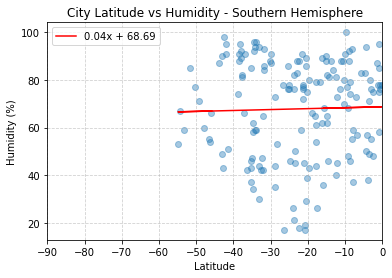

The r-value is 0.0258918798183684
The p-value is 0.7444047373110938
The standard error is 0.1181614522829875


In [18]:
# SOUTH
X = southern_hemi_df["Lat"]
Y = southern_hemi_df["Humidity"]
result = reg_this(X, Y)

# Get the appropriate scatter plot
# Some features reduced so it doesn't look as cluttered and the linear regression line can be accentuated.
plt.scatter(X, Y, alpha=.4)

# Other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity - Southern Hemisphere")
plt.xlim(-90,0)
plt.grid(linestyle="--", alpha = .6)

# Graph LinReg plot here
plt.plot(X, (result.slope*X+result.intercept), label=f"{result.slope:.2f}x + {result.intercept:.2f}", color = "red")

# Show plots
plt.legend(loc="best")
plt.show()
print(f"The r-value is {result.rvalue}")
print(f"The p-value is {result.pvalue}")
print(f"The standard error is {result.stderr}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

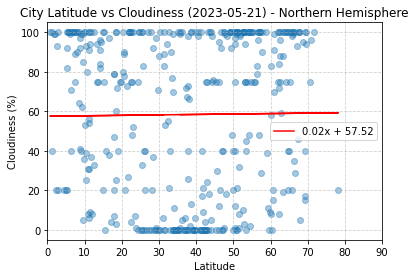

The r-value is 0.010777241519414182
The p-value is 0.83007446238911
The standard error is 0.10444326294733014


In [19]:
# NORTH
X = northern_hemi_df["Lat"]
Y = northern_hemi_df["Cloudiness"]
result = reg_this(X, Y)

plt.scatter(X, Y, alpha=.4)

# Other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-05-21) - Northern Hemisphere")
plt.xlim(0,90)
plt.grid(linestyle="--", alpha = .6)

# Graph LinReg plot here
plt.plot(X, (result.slope*X+result.intercept), label=f"{result.slope:.2f}x + {result.intercept:.2f}", color = "red")

# Show plots
plt.legend(loc="best")
plt.show()
print(f"The r-value is {result.rvalue}")
print(f"The p-value is {result.pvalue}")
print(f"The standard error is {result.stderr}")

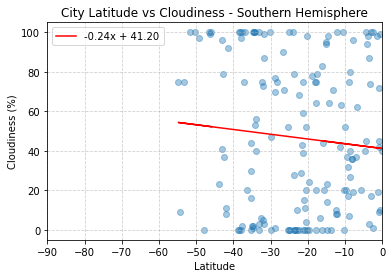

The r-value is -0.08800655299973602
The p-value is 0.2669419372939041
The standard error is 0.2155583147346284


In [20]:
# SOUTH
X = southern_hemi_df["Lat"]
Y = southern_hemi_df["Cloudiness"]
result = reg_this(X, Y)

plt.scatter(X, Y, alpha=.4)

# Other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness - Southern Hemisphere")
plt.xlim(-90,0)
plt.grid(linestyle="--", alpha = .6)

# Graph LinReg plot here
plt.plot(X, (result.slope*X+result.intercept), label=f"{result.slope:.2f}x + {result.intercept:.2f}", color = "red")

# Show plots
plt.legend(loc="best")
plt.show()
print(f"The r-value is {result.rvalue}")
print(f"The p-value is {result.pvalue}")
print(f"The standard error is {result.stderr}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

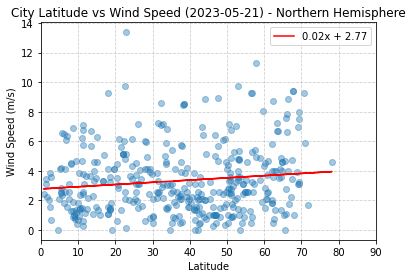

The r-value is 0.12823585863747602
The p-value is 0.01034534856269087
The standard error is 0.00582302441722872


In [21]:
# NORTH
X = northern_hemi_df["Lat"]
Y = northern_hemi_df["Wind Speed"]
result = reg_this(X, Y)

plt.scatter(X, Y, alpha=.4)

# Other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-05-21) - Northern Hemisphere")
plt.xlim(0,90)
plt.grid(linestyle="--", alpha = .6)

# Graph LinReg plot here
plt.plot(X, (result.slope*X+result.intercept), label=f"{result.slope:.2f}x + {result.intercept:.2f}", color = "red")

# Show plots
plt.legend(loc="best")
plt.show()
print(f"The r-value is {result.rvalue}")
print(f"The p-value is {result.pvalue}")
print(f"The standard error is {result.stderr}")

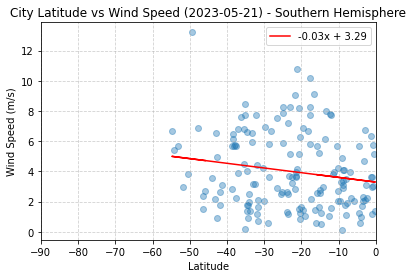

The r-value is -0.17234731824649815
The p-value is 0.028801807064556192
The standard error is 0.014080476260125927


In [22]:
# SOUTH
X = southern_hemi_df["Lat"]
Y = southern_hemi_df["Wind Speed"]
result = reg_this(X, Y)

plt.scatter(X, Y, alpha=.4)

# Other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-05-21) - Southern Hemisphere")
plt.xlim(-90,0)
plt.grid(linestyle="--", alpha = .6)

# Graph LinReg plot here
plt.plot(X, (result.slope*X+result.intercept), label=f"{result.slope:.2f}x + {result.intercept:.2f}", color = "red")

# Show plots
plt.legend(loc="best")
plt.show()
print(f"The r-value is {result.rvalue}")
print(f"The p-value is {result.pvalue}")
print(f"The standard error is {result.stderr}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE